In [549]:
import random
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

class Agent:
    def __init__(self, 
                 energy = 3,
                 food = 0, 
                 reproductionChance = .9,
                 foodChance = 0.5,
                 vision = 1.,
                 mutation = False,
                 mutationChance = 0.05, 
                 mutationRate = 0.3,
                 gamer = False,
                 cooperative = False,
                 competitive = False):
        
        self.energy = energy
        self.food = food
        self.vision = vision
        self.reproductionChance = reproductionChance
        self.foodChance = foodChance
        self.mutation = mutation
        self.mutationChance = mutationChance
        self.mutationRate = mutationRate
        self.mutated = False
        self.gamer = gamer
        self.cooperative = cooperative
        self.competitive = competitive
        
        if mutation:
            self.Mutation()
            
        if gamer and not (cooperative or competitive):
            if random.random() < 0.5:
                self.cooperative = True
            else:
                self.competitive = True
                


    def Mutation(self):
        if random.random() < self.mutationChance:
            self.mutated = True
            variation = random.randrange(-1, 2, 2)     # returns -1 or 1
            self.vision = self.vision + (variation * self.mutationRate)
            self.foodChance = self.foodChance + (variation * self.mutationRate)
            self.energy = self.energy - variation     # Mutation of a vision ability has a energy cost
            
        
class World:
    
    def __init__(self, agents,
                 foodCapacity = population*1.2, 
                 dayLength = population*2.4,
                 repFoodLimit = 1,
                 repEnergyLimit = 3):
        
        self.foodCapacity = foodCapacity
        self.dayLength = dayLength
        self.agents = agents
        self.repFoodLimit = repFoodLimit
        self.repEnergyLimit = repEnergyLimit
    
    def feed(self):
        foodCapacity = self.foodCapacity
        dayLength = self.dayLength
        
        while foodCapacity and dayLength:
            agent = random.choice(self.agents)  # For each food function chooses a random agent than try its chance to feed
            
            if random.random() < agent.foodChance:
                
                if agent.gamer:             # If it has a strategy
                    if agent.cooperative:
                        
                        if random.random() < (sum([i.cooperative for i in self.agents])/len(self.agents)):
                            agent.food = agent.food + 1
                            foodCapacity = foodCapacity - 1
                            
                        else:
                            agent.food = agent.food + 0.5
                            foodCapacity = foodCapacity - 0.5
                            
                    if agent.competitive:
                        if random.random() < (sum([i.cooperative for i in self.agents])/len(self.agents)):
                            agent.food = agent.food + 1.5
                            foodCapacity = foodCapacity - 1.5
                            
                        else:
                            agent.food = agent.food + 0
                            foodCapacity = foodCapacity - 0
                else:
                    agent.food = agent.food + 1
                    foodCapacity = foodCapacity - 1
                    
            dayLength = dayLength - 1 
        
            
    def endOfTheDay(self):
        newBorns = []
        
        for agent in self.agents:
            if agent.food < 1:       # If agent has 0.5 food it has chance to survive %50
                if random.random() < agent.food:
                    continue
                else:
                    self.agents.remove(agent)
                
            if agent.food + agent.energy > self.repFoodLimit + self.repEnergyLimit:
                newBorns.append(Agent(energy = agent.energy,
                                      foodChance = agent.foodChance,
                                      vision = agent.vision,
                                      mutation = agent.mutation,
                                      gamer = agent.gamer,
                                      cooperative = agent.cooperative,
                                      competitive = agent.competitive))
            
            agent.food = 0
            
        self.agents = self.agents + newBorns

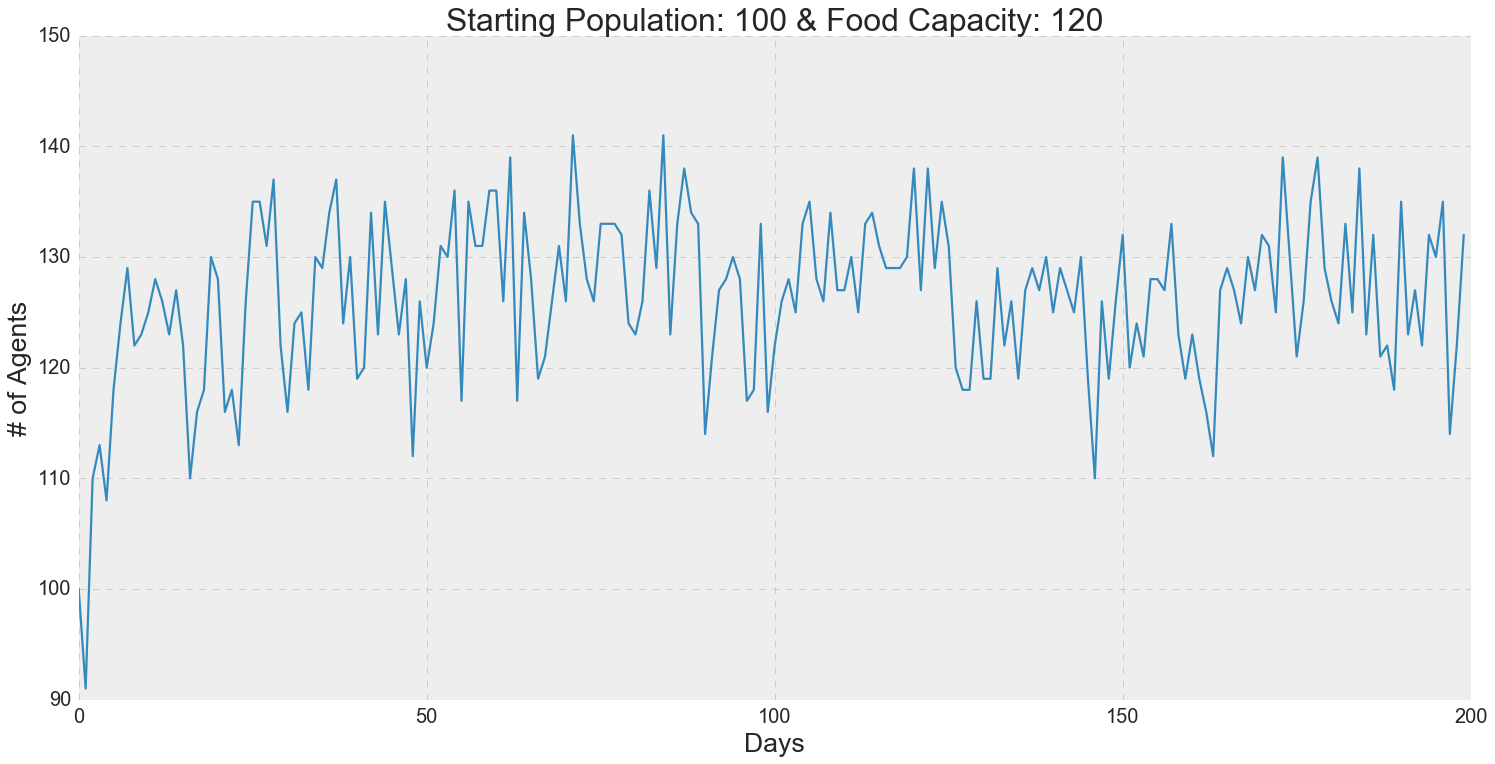

In [496]:
population = 100
nDays = 200

agents = [Agent() for i in range(population)]
nAgents = []
world = World(agents)
for i in range(nDays):
    nAgents.append(len(world.agents))
    world.feed()
    world.endOfTheDay()
    

plt.figure(figsize=(20,10)) 
plt.xlabel('Days')
plt.ylabel('# of Agents')
plt.title('Starting Population: '+ str(population) +' & Food Capacity: '+ str(int(population*1.2)))
plt.plot(nAgents)

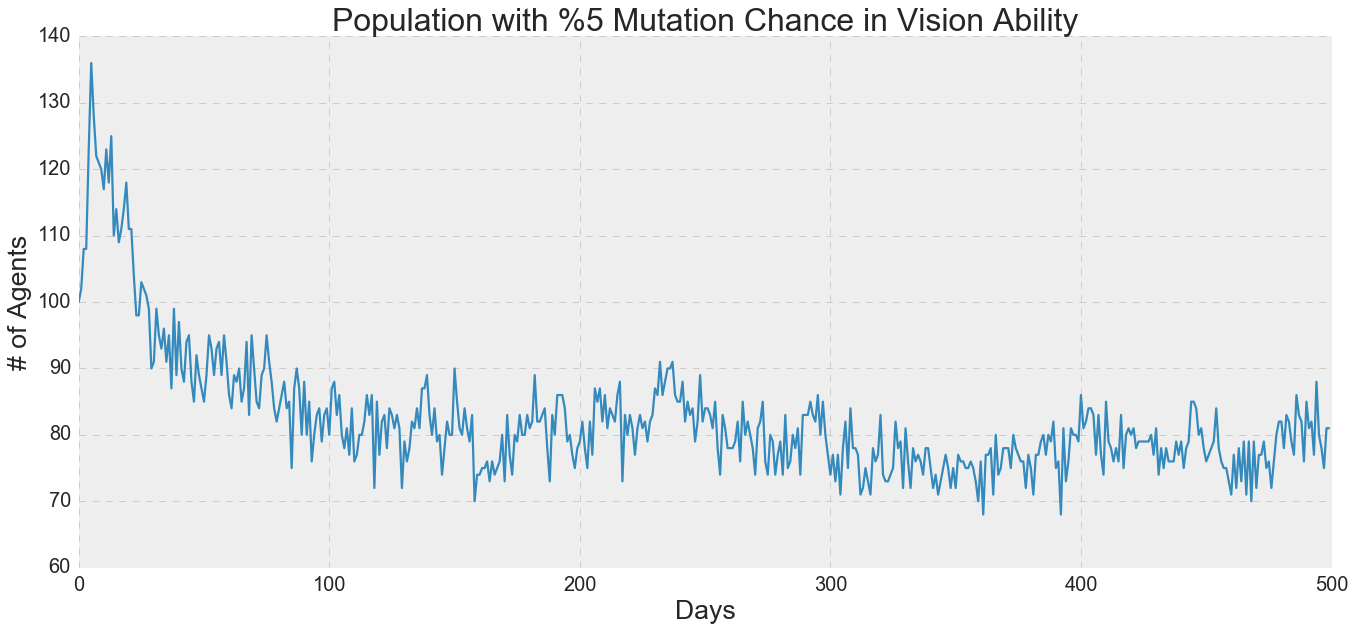

In [536]:
population = 100
nDays = 500

agents = [Agent(mutation = True) for i in range(population)]
nAgents = []
avgVision = []

world = World(agents)
for i in range(nDays):
    nAgents.append(len(world.agents))
    avgVision.append(sum([i.vision for i in world.agents])/nAgents[i])
    world.feed()
    world.endOfTheDay()
    
plt.figure(figsize=(18,8))
plt.xlabel('Days')
plt.ylabel('# of Agents')
plt.title('Population with %5 Mutation Chance in Vision Ability')
plt.plot(nAgents)

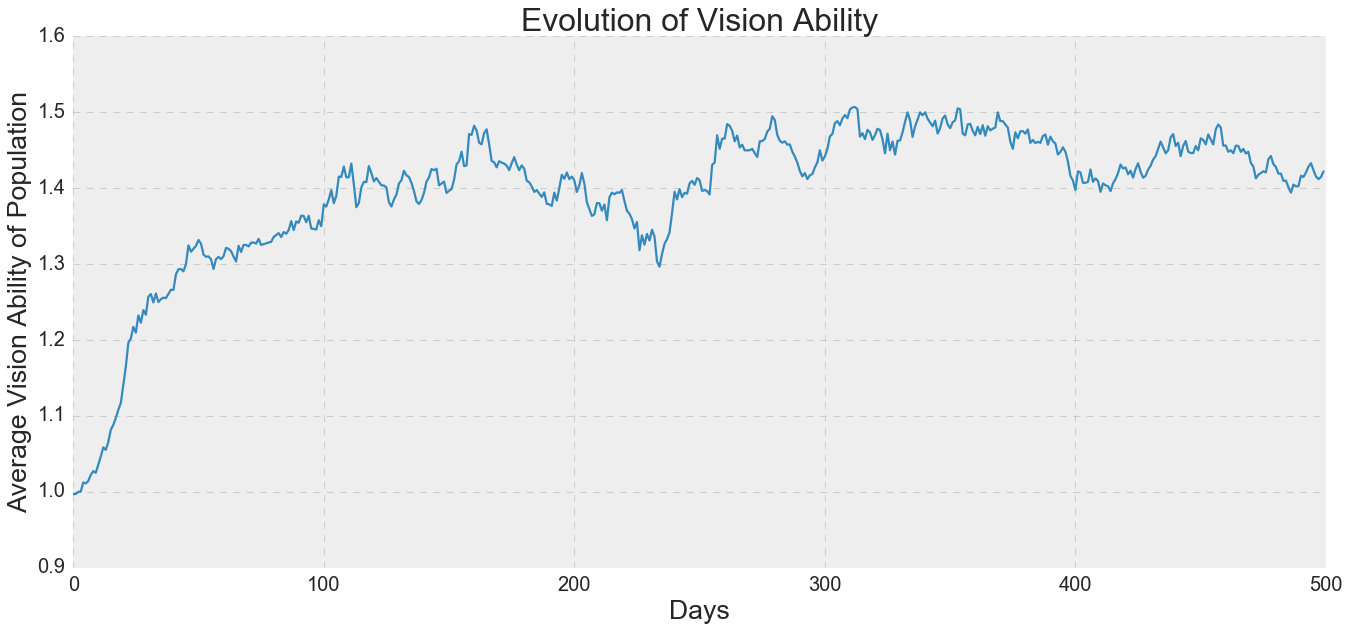

In [538]:
plt.figure(figsize=(18,8))
plt.xlabel('Days')
plt.ylabel('Average Vision Ability of Population')
plt.title('Evolution of Vision Ability')
plt.plot(avgVision)

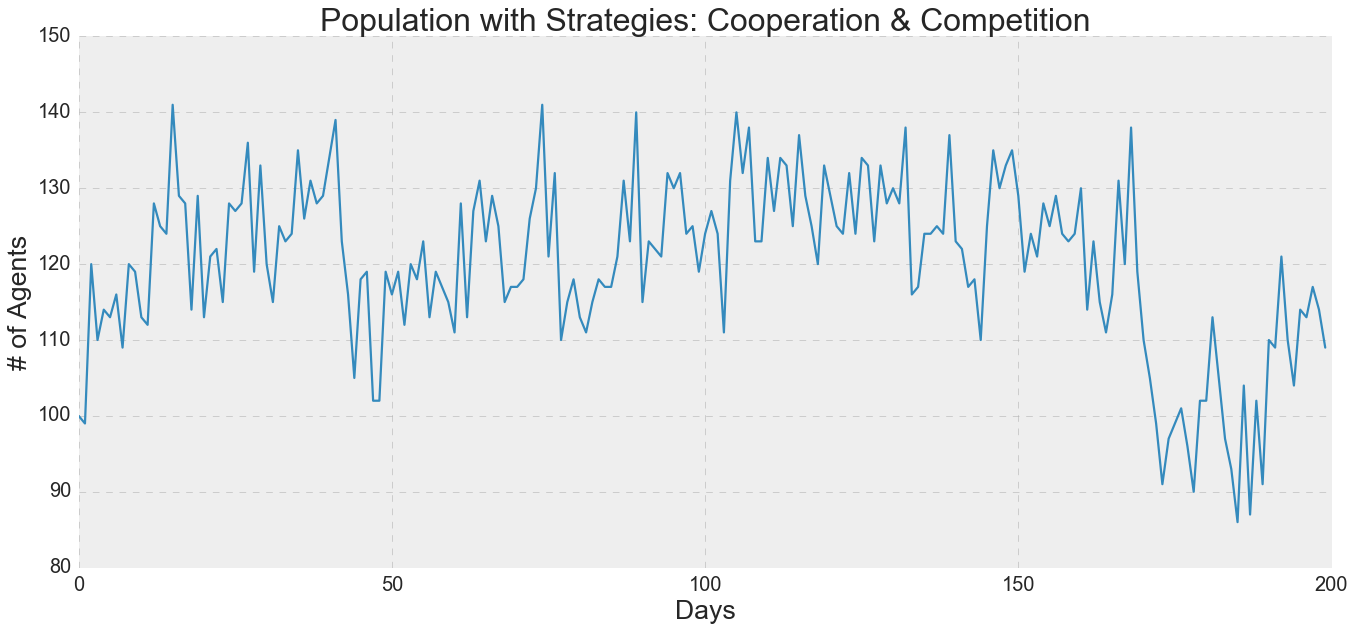

In [547]:
population = 100
nDays = 200

agents = [Agent(gamer = True) for i in range(population)]
nAgents = []
nCoop = []
nComp = []

world = World(agents)
for i in range(nDays):
    nAgents.append(len(world.agents))
    nCoop.append(sum([i.cooperative for i in world.agents]))
    nComp.append(sum([i.competitive for i in world.agents]))
    world.feed()
    world.endOfTheDay()

plt.figure(figsize=(18,8))
plt.xlabel('Days')
plt.ylabel('# of Agents')
plt.title('Population with Strategies: Cooperation & Competition')
plt.plot(nAgents)

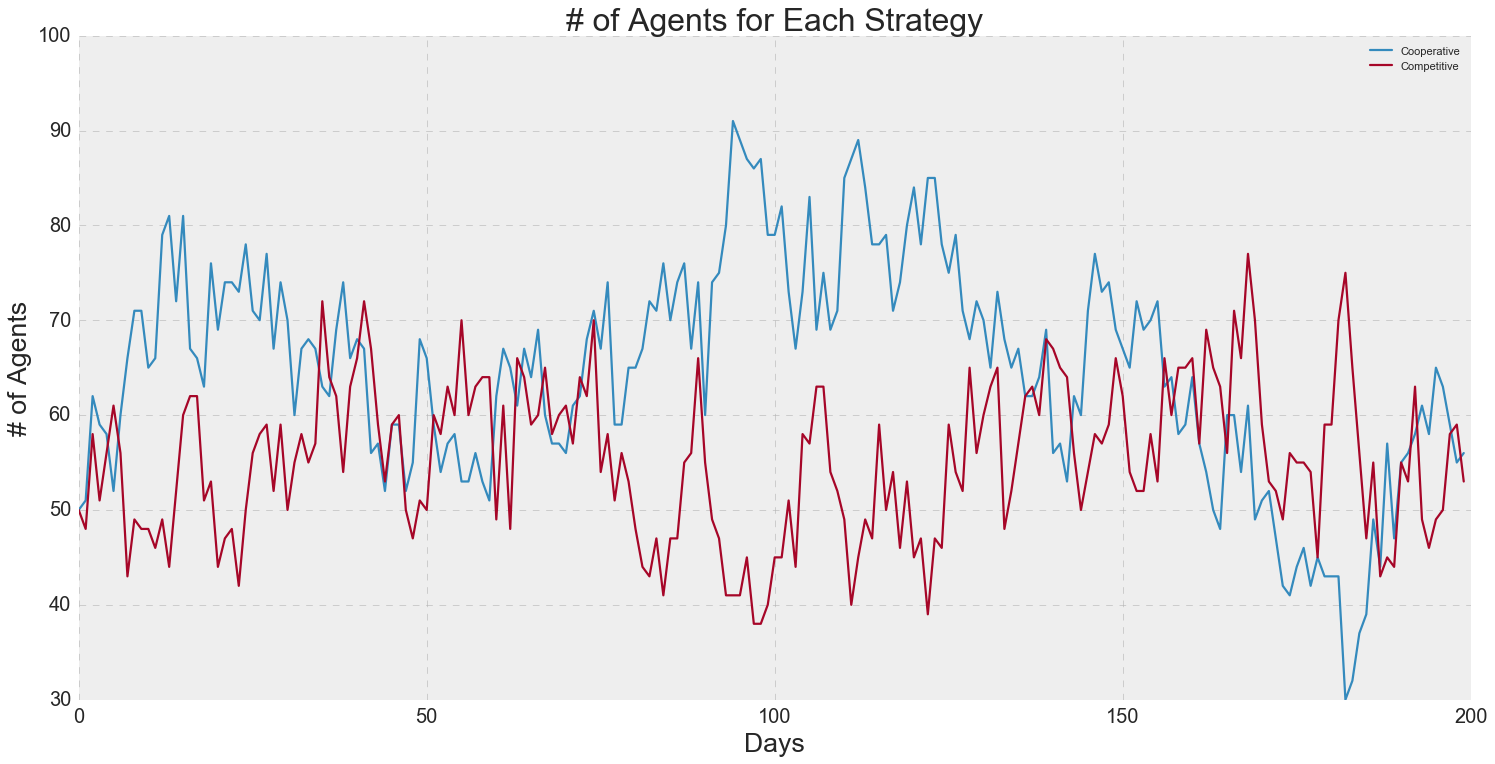

In [548]:
plt.figure(figsize=(20,10))
plt.xlabel('Days')
plt.ylabel('# of Agents')
plt.title('# of Agents for Each Strategy')
plt.plot(nCoop, label='Cooperative')
plt.plot(nComp, label='Competitive')
plt.legend()